In [16]:
import pandas as pd
import numpy as np
import json
import requests
import random 
import time
import matplotlib.pyplot as plt 
from citipy import citipy
from config import weather_api_key
from datetime import datetime

In [21]:
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)


In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

45

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-06 18:17:28'

In [40]:
city_data = {"City": [] , "Lat": [] , "Lng": [] , "Max Temp": [] , "Humidity": [] , "Cloudiness": [] , "Wind Speed": [] , "Country": [] , "Date": []}

for i in range(len(cities)):
    # Create endpoint URL with each city.
    city_name = cities[i]
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}'
    time.sleep(1.25)
    try: 
        city_weather = requests.get(url).json()
        # Parse out the needed data.
        name = city_weather["name"]
        city_data["City"].append(name)

        city_lat = city_weather["coord"]["lat"]
        city_data["Lat"].append(city_lat)

        city_lng = city_weather["coord"]["lon"]
        city_data["Lng"].append(city_lng)

        city_max_temp_kel = city_weather["main"]["temp_max"]
        city_max_temp = city_max_temp_kel - 273.15
        city_data["Max Temp"].append(city_max_temp)

        city_humidity = city_weather["main"]["humidity"]
        city_data["Humidity"].append(city_humidity)

        city_clouds = city_weather["clouds"]["all"]
        city_data["Cloudiness"].append(city_clouds)

        city_wind = city_weather["wind"]["speed"]
        city_data["Wind Speed"].append(city_wind)

        city_country = city_weather["sys"]["country"]
        city_data["Country"].append(city_country)

            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data["Date"].append(city_date)
    except:
        print(f"City '{city_name}' NOT found on OpenWeatherAPI cloud.")
        pass

city_data_df = pd.DataFrame(city_data)
city_data_df.head()



City 'taolanaro' NOT found on OpenWeatherAPI cloud.
City 'rungata' NOT found on OpenWeatherAPI cloud.
City 'vaitupu' NOT found on OpenWeatherAPI cloud.
City 'sentyabrskiy' NOT found on OpenWeatherAPI cloud.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,29.62,50,1,4.12,US,2021-06-06 19:39:07
1,Pachperwa,27.5167,82.6500,30.77,39,19,2.18,IN,2021-06-06 19:40:04
2,Lorengau,-2.0226,147.2712,26.61,78,96,1.82,PG,2021-06-06 19:37:44
3,Mbeya,-8.9000,33.4500,12.21,94,48,3.03,TZ,2021-06-06 19:40:05
4,Bluff,-46.6000,168.3333,8.28,84,76,4.17,NZ,2021-06-06 19:40:05


In [43]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

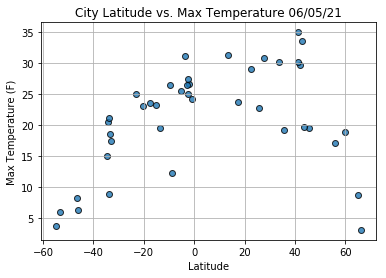

In [45]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

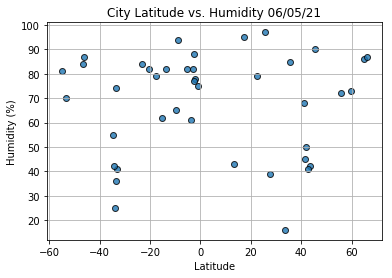

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

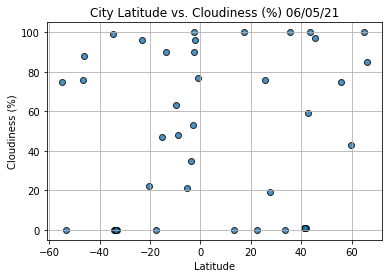

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

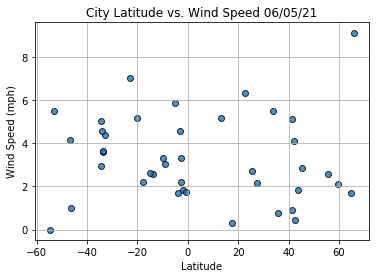

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()